In [6]:
import matplotlib.pyplot as plt
import random
from scipy.io import loadmat

# Q3

In [11]:
# Load the dataset

# Load .mat file
train_data = loadmat('mnist_train.mat')
test_data = loadmat('mnist_test.mat')

# Extract the images and labels
train_images, train_labels, test_images, test_labels = train_data['train_X'], train_data['train_labels'] - 1, test_data['test_X'], test_data['test_labels'] - 1

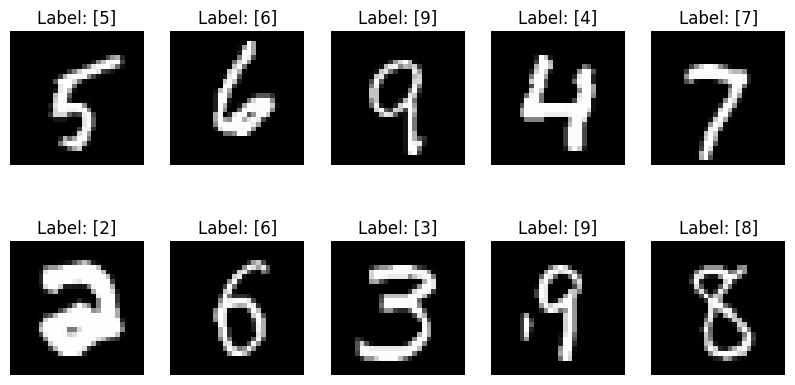

In [12]:
# Visualise dataset

# Reshape the images to their original 28x28 format
images_reshaped = train_images.reshape((-1, 28, 28))

# Visualize the first few images along with their labels
plt.figure(figsize=(10, 5))
for i in range(10):  # Visualize 10 samples
    plt.subplot(2, 5, i + 1)
    random_integer = random.randint(0, len(train_images))
    plt.imshow(images_reshaped[random_integer], cmap='gray')
    plt.title(f"Label: {train_labels[random_integer]}")
    plt.axis('off')
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# TODO: Standardize the data
scaler = StandardScaler()
train_images_scaled = scaler.fit_transform(train_images.reshape(-1, 784))
test_images_scaled = scaler.transform(test_images.reshape(-1, 784))

In [14]:
# TODO: Define MLP model by specifying all necessary parameters
mlp_clf = MLPClassifier(max_iter=10, verbose=True)

# TODO: Train the classifier
mlp_clf.fit(train_images_scaled, train_labels)

# TODO: Predict on the test set
test_predictions = mlp_clf.predict(test_images_scaled)

# TODO: Calculate the model accuracy (ideally can do this for both train and test sets)
test_accuracy = accuracy_score(test_labels, test_predictions) * 100
print(f"Accuracy: {test_accuracy:.2f}%")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.34979291
Iteration 2, loss = 0.13689140
Iteration 3, loss = 0.09586948
Iteration 4, loss = 0.07209107
Iteration 5, loss = 0.05594891
Iteration 6, loss = 0.04453163
Iteration 7, loss = 0.03449355
Iteration 8, loss = 0.02793438
Iteration 9, loss = 0.02262577
Iteration 10, loss = 0.01857769
Accuracy: 97.36%


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


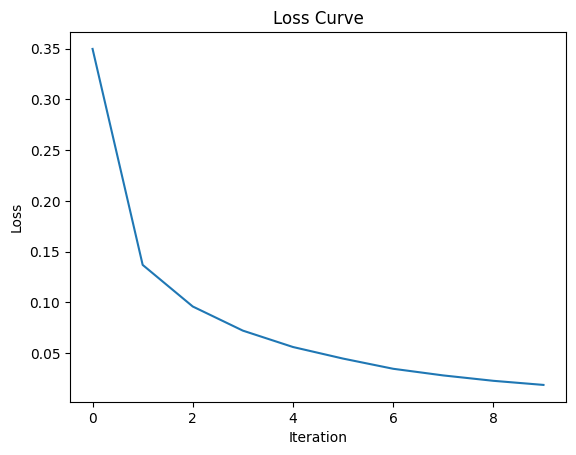

In [15]:
# TODO: Show loss plots
plt.plot(mlp_clf.loss_curve_)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

# Q4

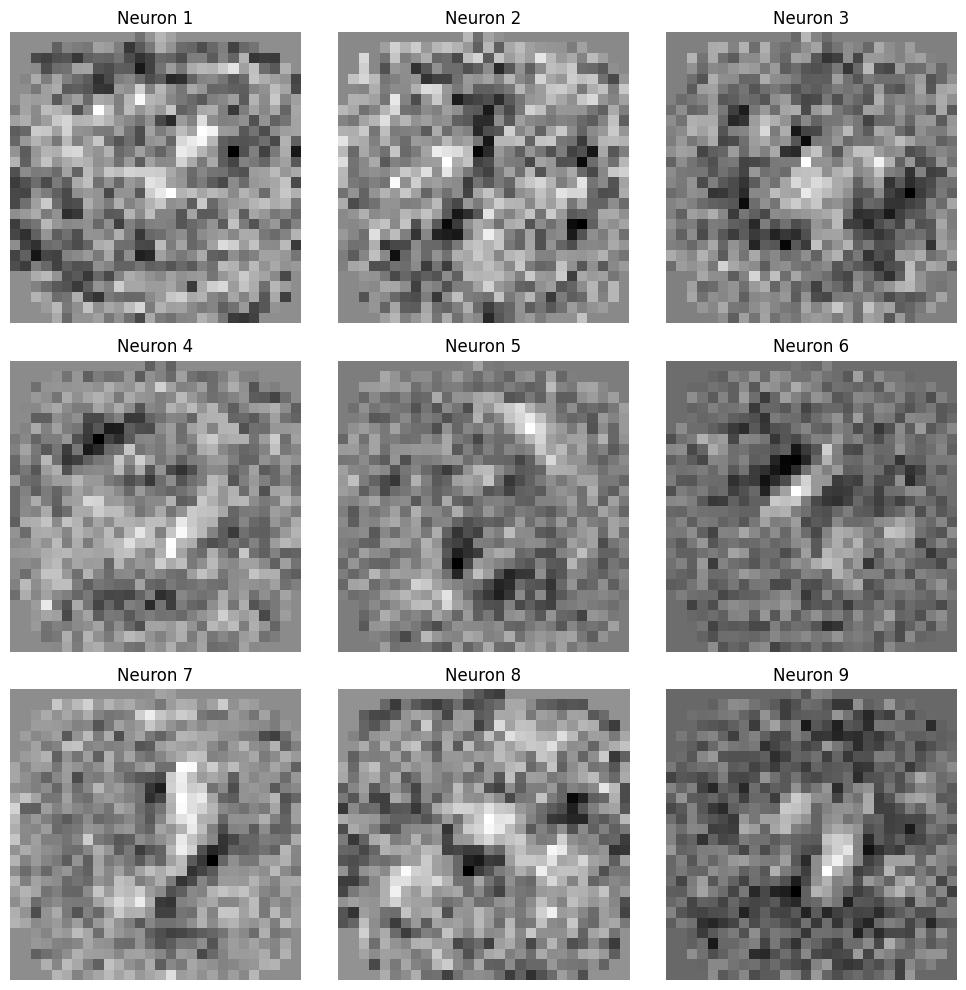

In [19]:
# TODO: Get the weight matrix of the first hidden layer
weight_matrix = mlp_clf.coefs_[0]

# Normalize each row of the weight matrix to [0, 1]
normalized_weight_matrix = (weight_matrix - weight_matrix.min()) / (weight_matrix.max() - weight_matrix.min())

# Visualize 9 neurons' weights
num_neurons_to_visualize = 9
plt.figure(figsize=(10, 10))
for i in range(num_neurons_to_visualize):
    plt.subplot(3, 3, i + 1)
    neuron_weights = normalized_weight_matrix[:, i].reshape(28, 28)
    plt.imshow(neuron_weights, cmap='gray')
    plt.title(f"Neuron {i + 1}")
    plt.axis('off')

plt.tight_layout()
plt.show()